In [1]:
!pip install yellowbrick
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

# EDA

In [3]:
df=pd.read_csv("BostonHousing.csv")
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [4]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

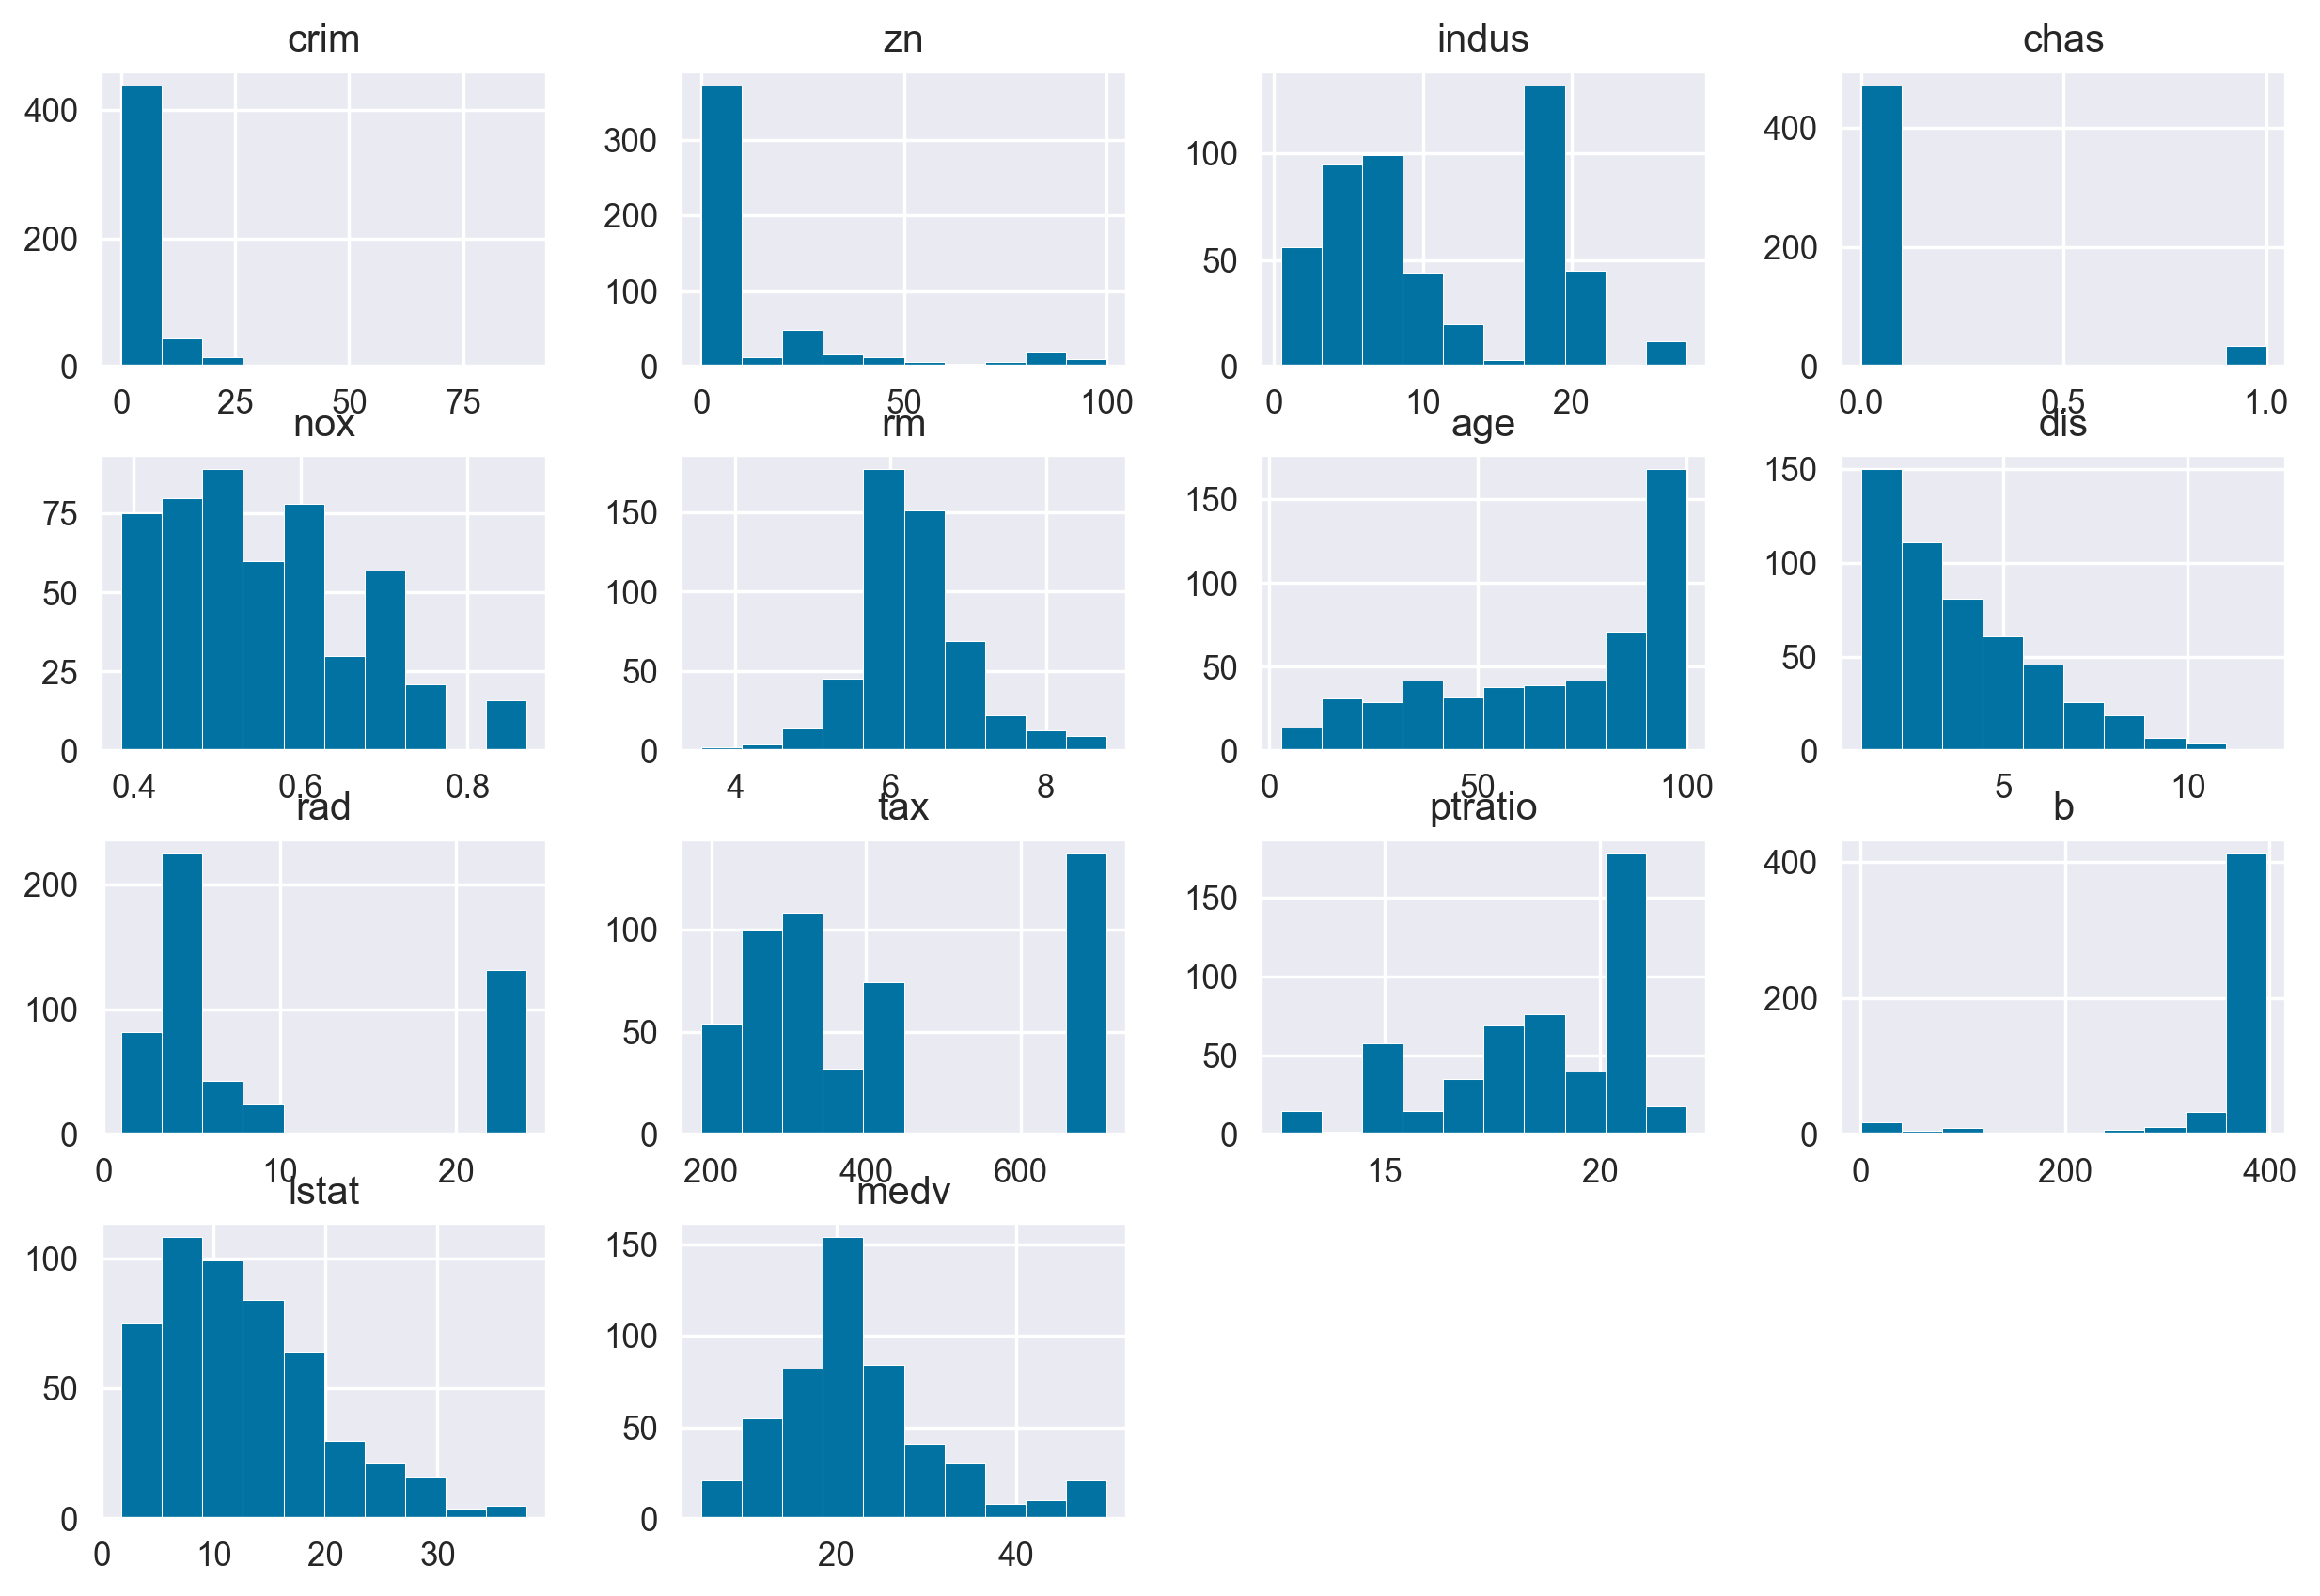

In [8]:
df.hist(figsize=(12, 8))

In [9]:
sns.pairplot(df)

<Axes: >

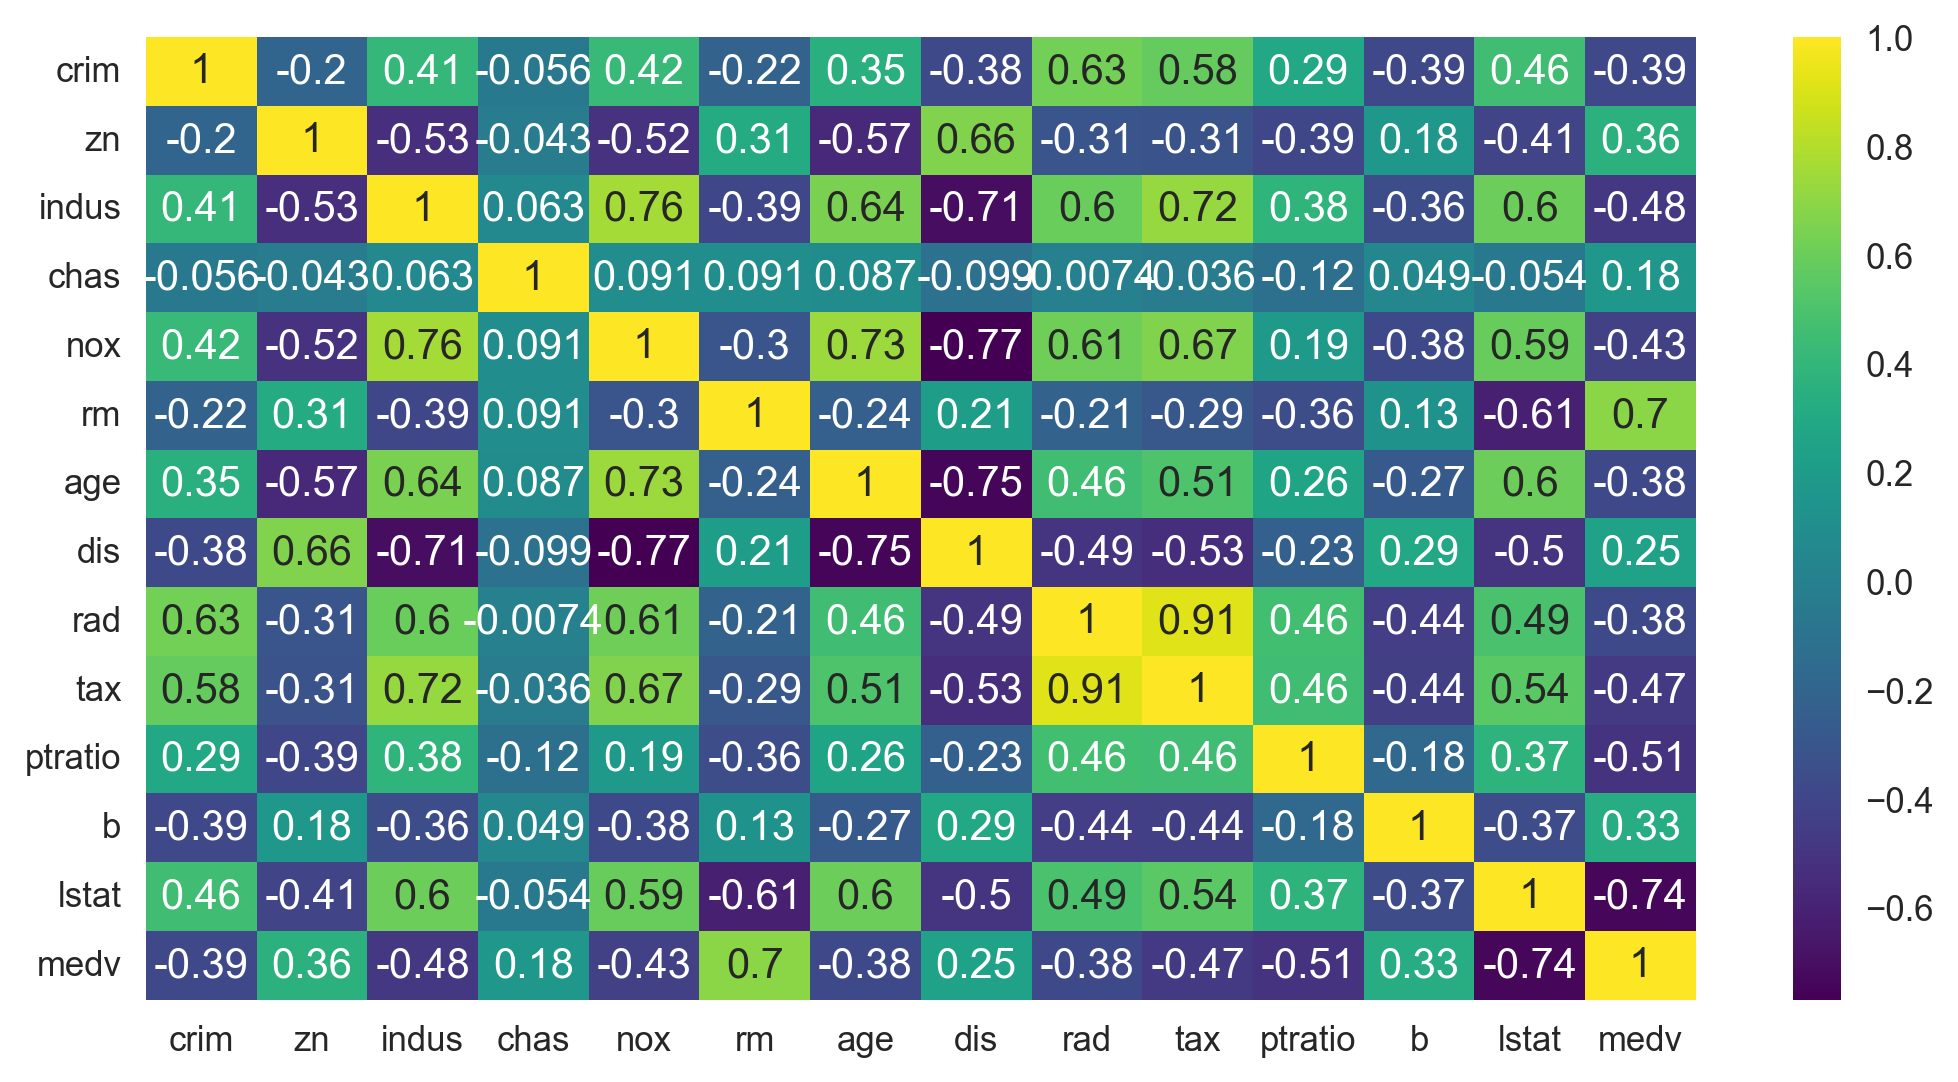

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<Axes: >

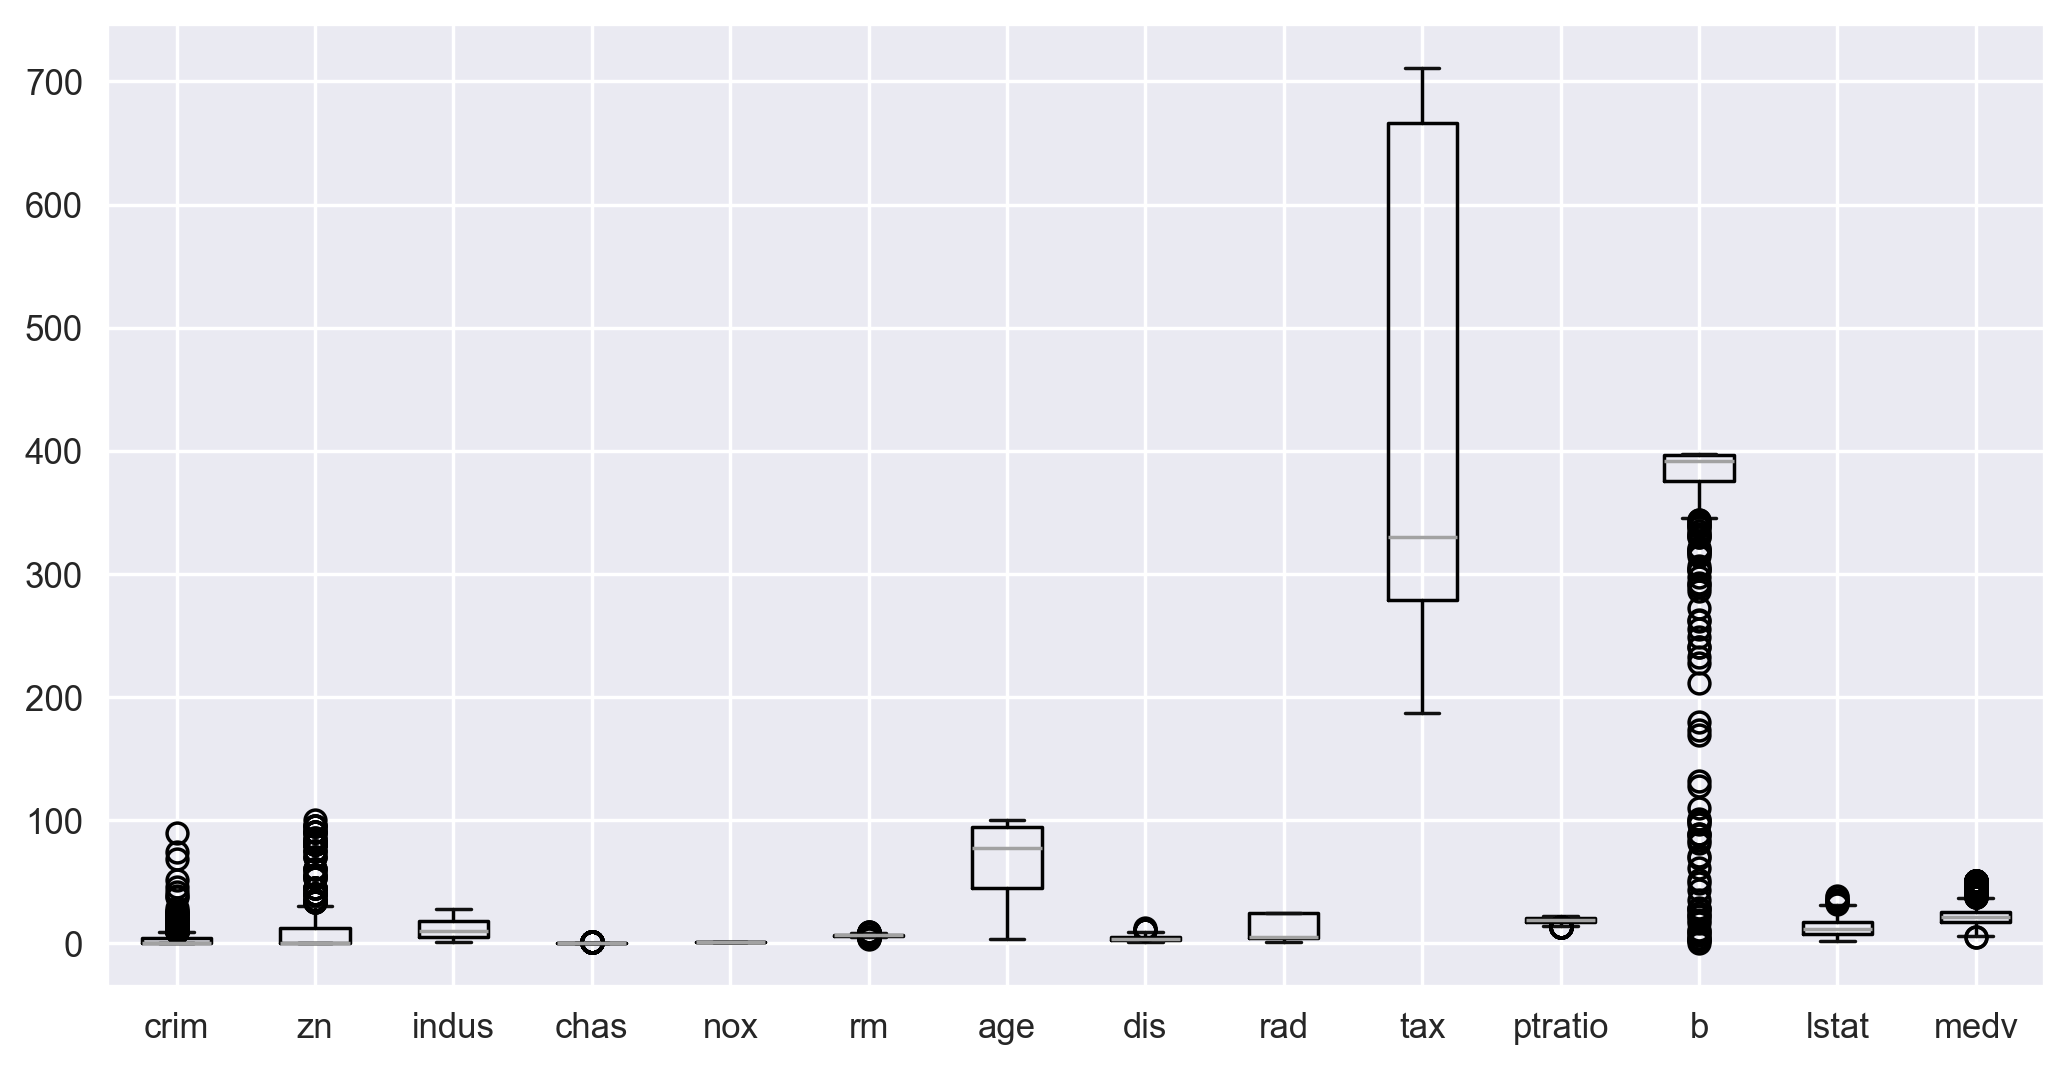

In [11]:
df.boxplot()

In [12]:
outliers={}

for col in df.select_dtypes(include=['number']).columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    outliers[col]=df[(df[col]<lower) | (df[col]>upper)]

for col,outlier_data in outliers.items():
    print(f"{col} outliers ")
    print(outlier_data.shape[0])


crim outliers 
66
zn outliers 
68
indus outliers 
0
chas outliers 
35
nox outliers 
0
rm outliers 
30
age outliers 
0
dis outliers 
5
rad outliers 
0
tax outliers 
0
ptratio outliers 
15
b outliers 
77
lstat outliers 
7
medv outliers 
40


In [13]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))

    return data


In [14]:
df = capping(df, ['crim', 'medv', 'lstat', 'b', 'ptratio', 'dis', 'rm', 'zn', 'chas'])
X = df.iloc[:, :-1]
y = df['medv']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ASSUMPTION RELATED TO PREDICTORS 

In [16]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display VIF values
print(vif_data.sort_values(by="VIF", ascending=False))


    Feature        VIF
8       rad  12.429559
0      crim   9.333758
9       tax   8.568666
4       nox   4.461754
7       dis   4.100129
2     indus   3.978715
12    lstat   3.231076
6       age   3.104069
1        zn   2.431520
5        rm   2.028339
10  ptratio   1.871127
11        b   1.345880
3      chas        NaN


In [17]:
# rfe=rfecv(LinearRegression(),x,y)
# ref_sel=pd.DataFrame({
#     "col":x.columns,'ranking':rfe.ranking_})
# ref_sel

In [18]:
X1 = X.drop(columns=['rad'])
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, y, random_state=42, test_size=0.3)

lr1 = LinearRegression()
lr1.fit(xtrain1, ytrain1)
ypred1 = lr1.predict(xtest1)

mse1 = mean_squared_error(ytest1, ypred1)
r2_1 = r2_score(ytest1, ypred1)

print(f"Mean Squared Error for X1: {mse1:.4f}")
print(f"R² Score for X1: {r2_1:.4f}")


Mean Squared Error for X1: 13.6032
R² Score for X1: 0.7342


In [28]:
X2 = X.drop(columns=['crim'])
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y, random_state=42, test_size=0.3)

lr2 = LinearRegression()
lr2.fit(xtrain2, ytrain2)
ypred2 = lr2.predict(xtest2)

mse2 = mean_squared_error(ytest2, ypred2)
r2_2 = r2_score(ytest2, ypred2)

print(f"Mean Squared Error for X2: {mse2:.4f}")
print(f"R² Score for X2: {r2_2:.4f}")


Mean Squared Error for X2: 12.7921
R² Score for X2: 0.7500


In [35]:
# ypred = regr.predict(xtest)
# plt.scatter(xtest2, ytest2, color ='b')
# plt.plot( ytest2,ypred2, color ='k')
# plt.show()


In [36]:
X_1=X.drop(columns=['crim','chas'])
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X_1, y, random_state=42, test_size=0.3)
model = LinearRegression()
model.fit(xtrain1, ytrain1)
ypred = model.predict(xtest1)
mse = mean_squared_error(ytest1, ypred)
r2 = r2_score(ytest1, ypred)
print(f"Mean Squared Error for X1: {mse}")
print(f"R² Score for X1: {r2}")

Mean Squared Error for X1: 12.7920956319249
R² Score for X1: 0.7500405339187652


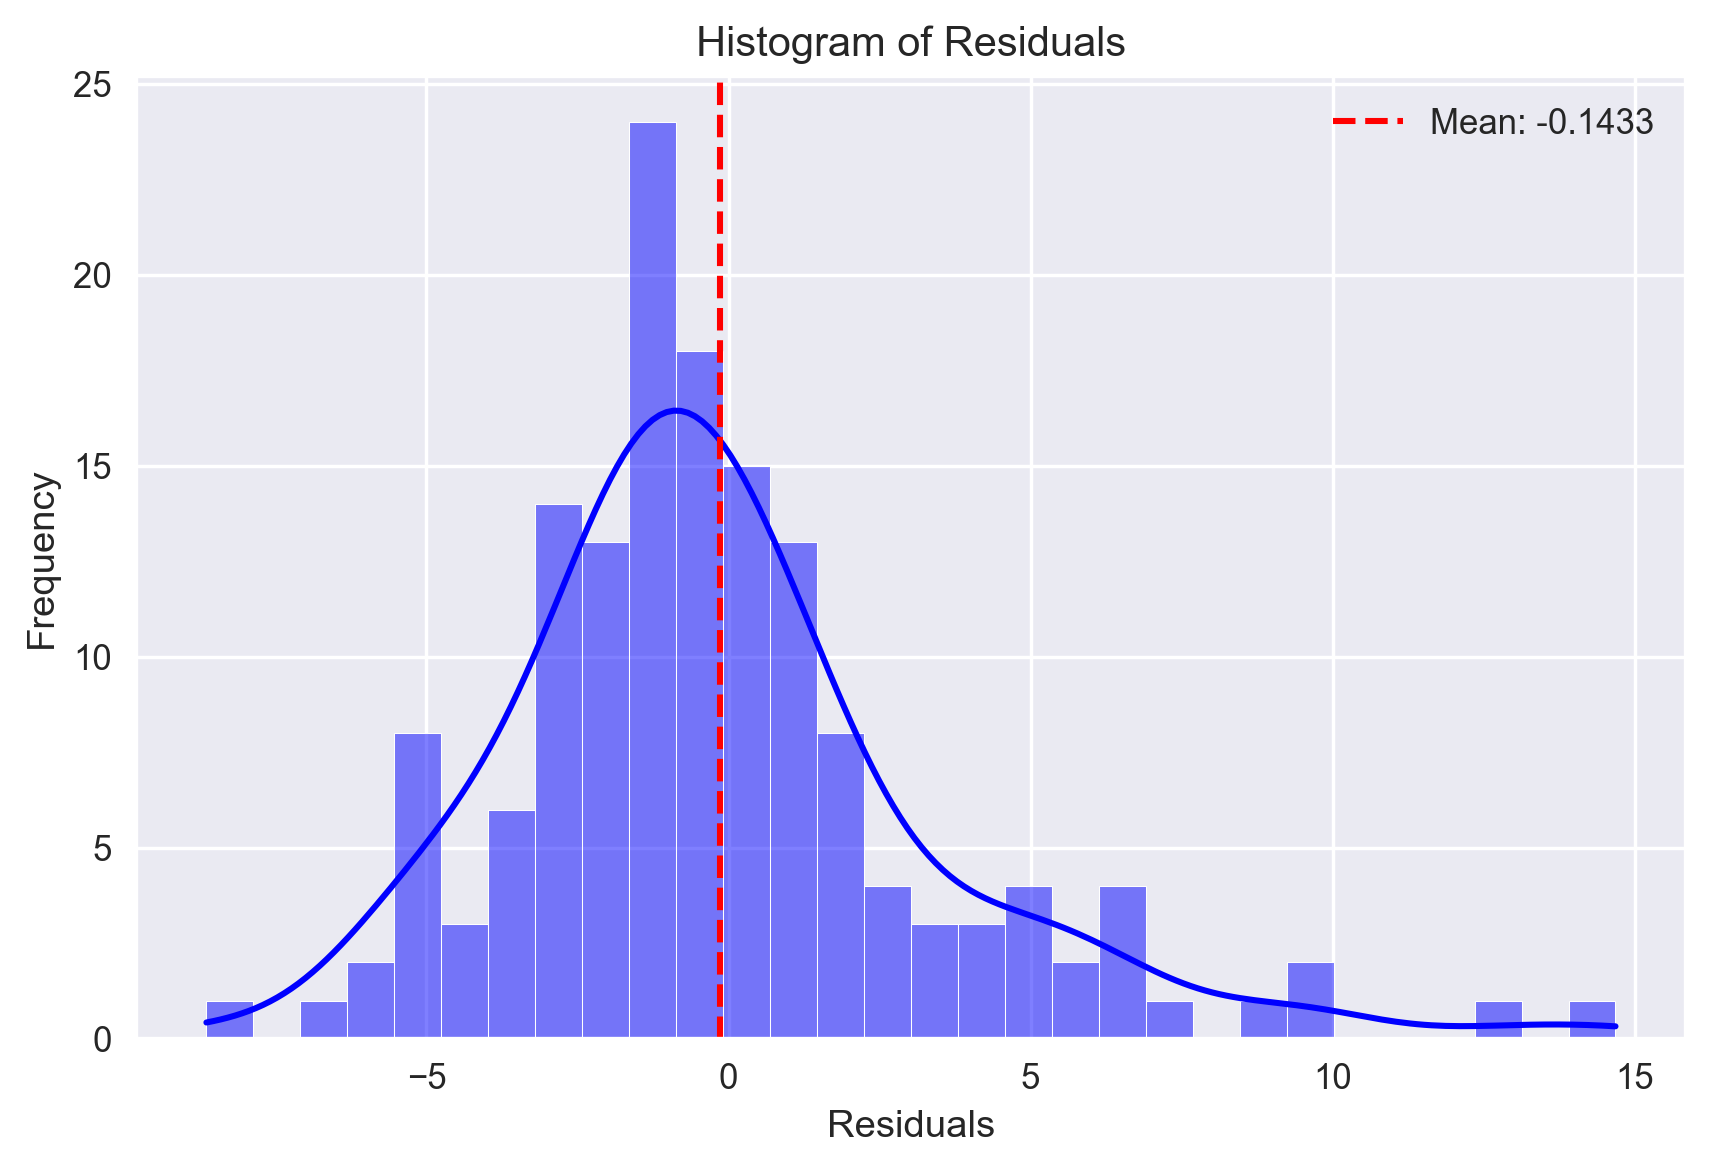

In [37]:
residuals = ytest1 - ypred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(residuals.mean(), color='red', linestyle='dashed', label=f"Mean: {residuals.mean():.4f}")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Text(0, 0.5, 'Residuals')

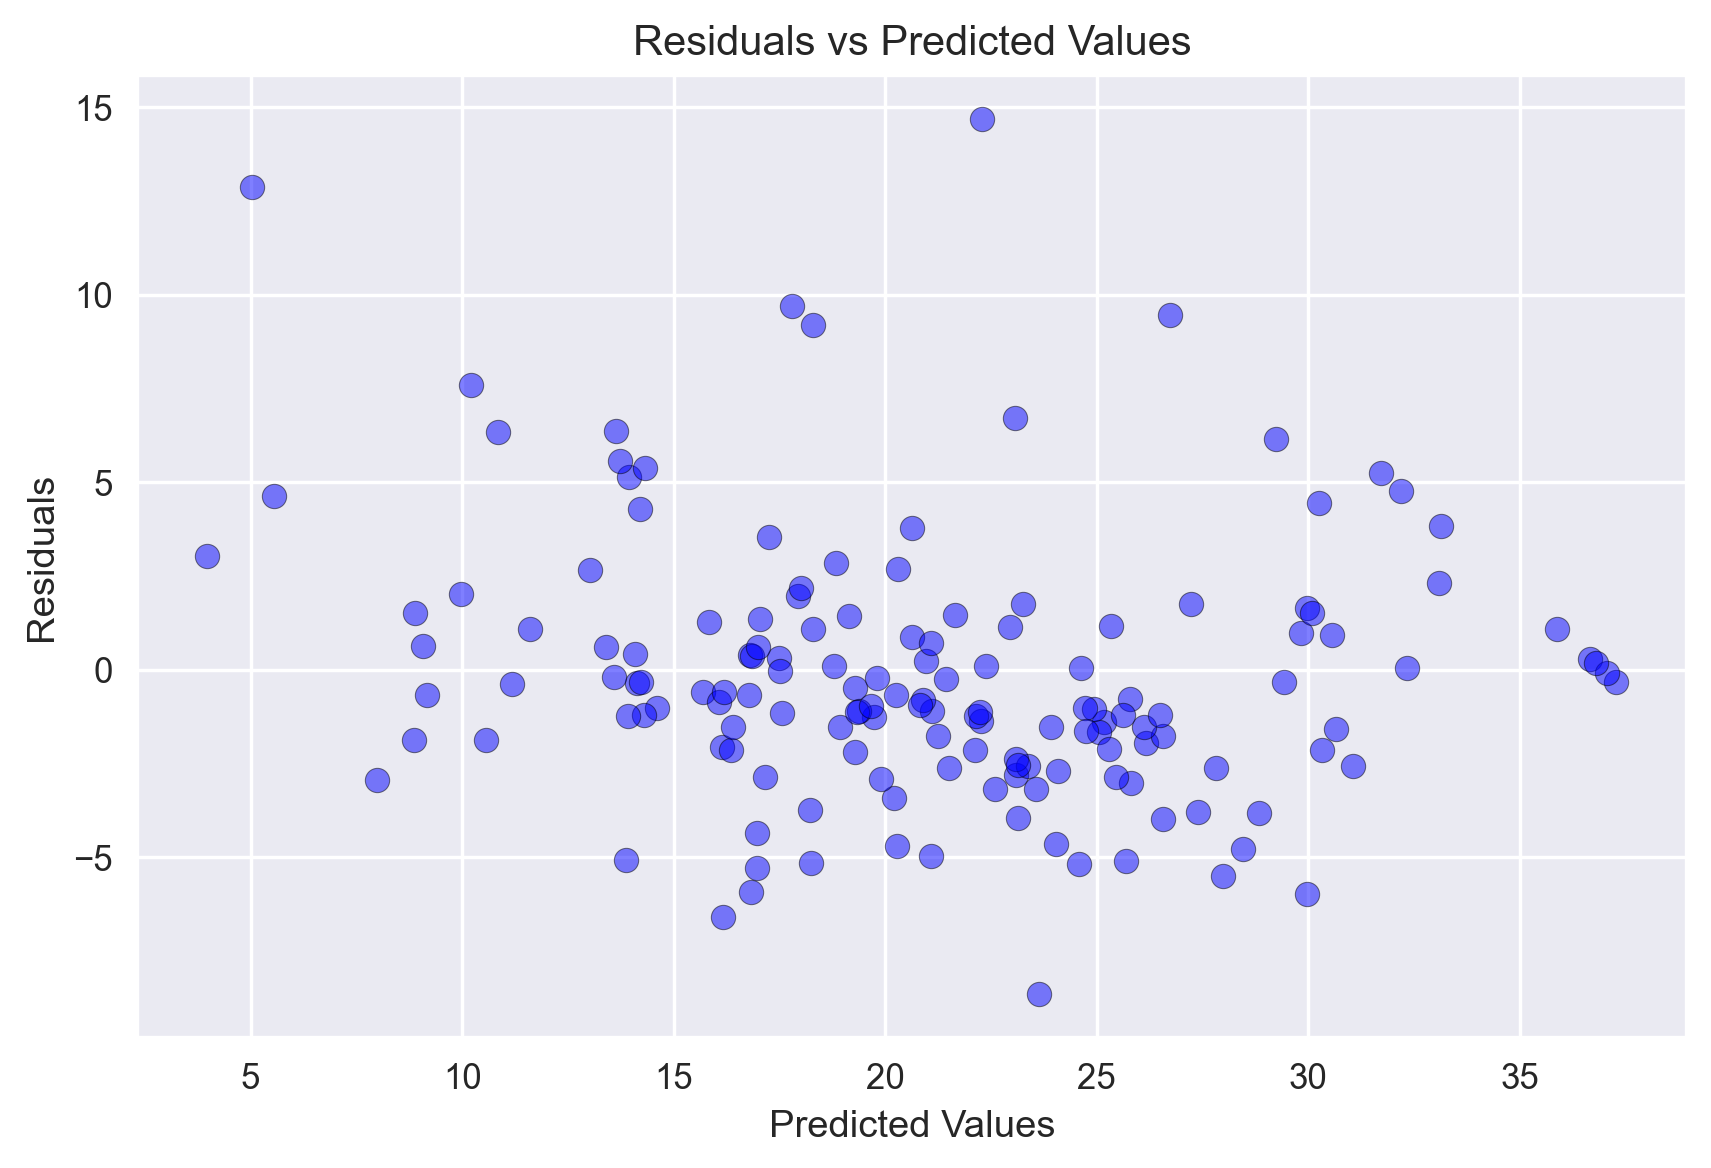

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(ypred, residuals, alpha=0.5, color='blue', edgecolors='black')
# plt.axhline(0, color='red', linestyle='dashed')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

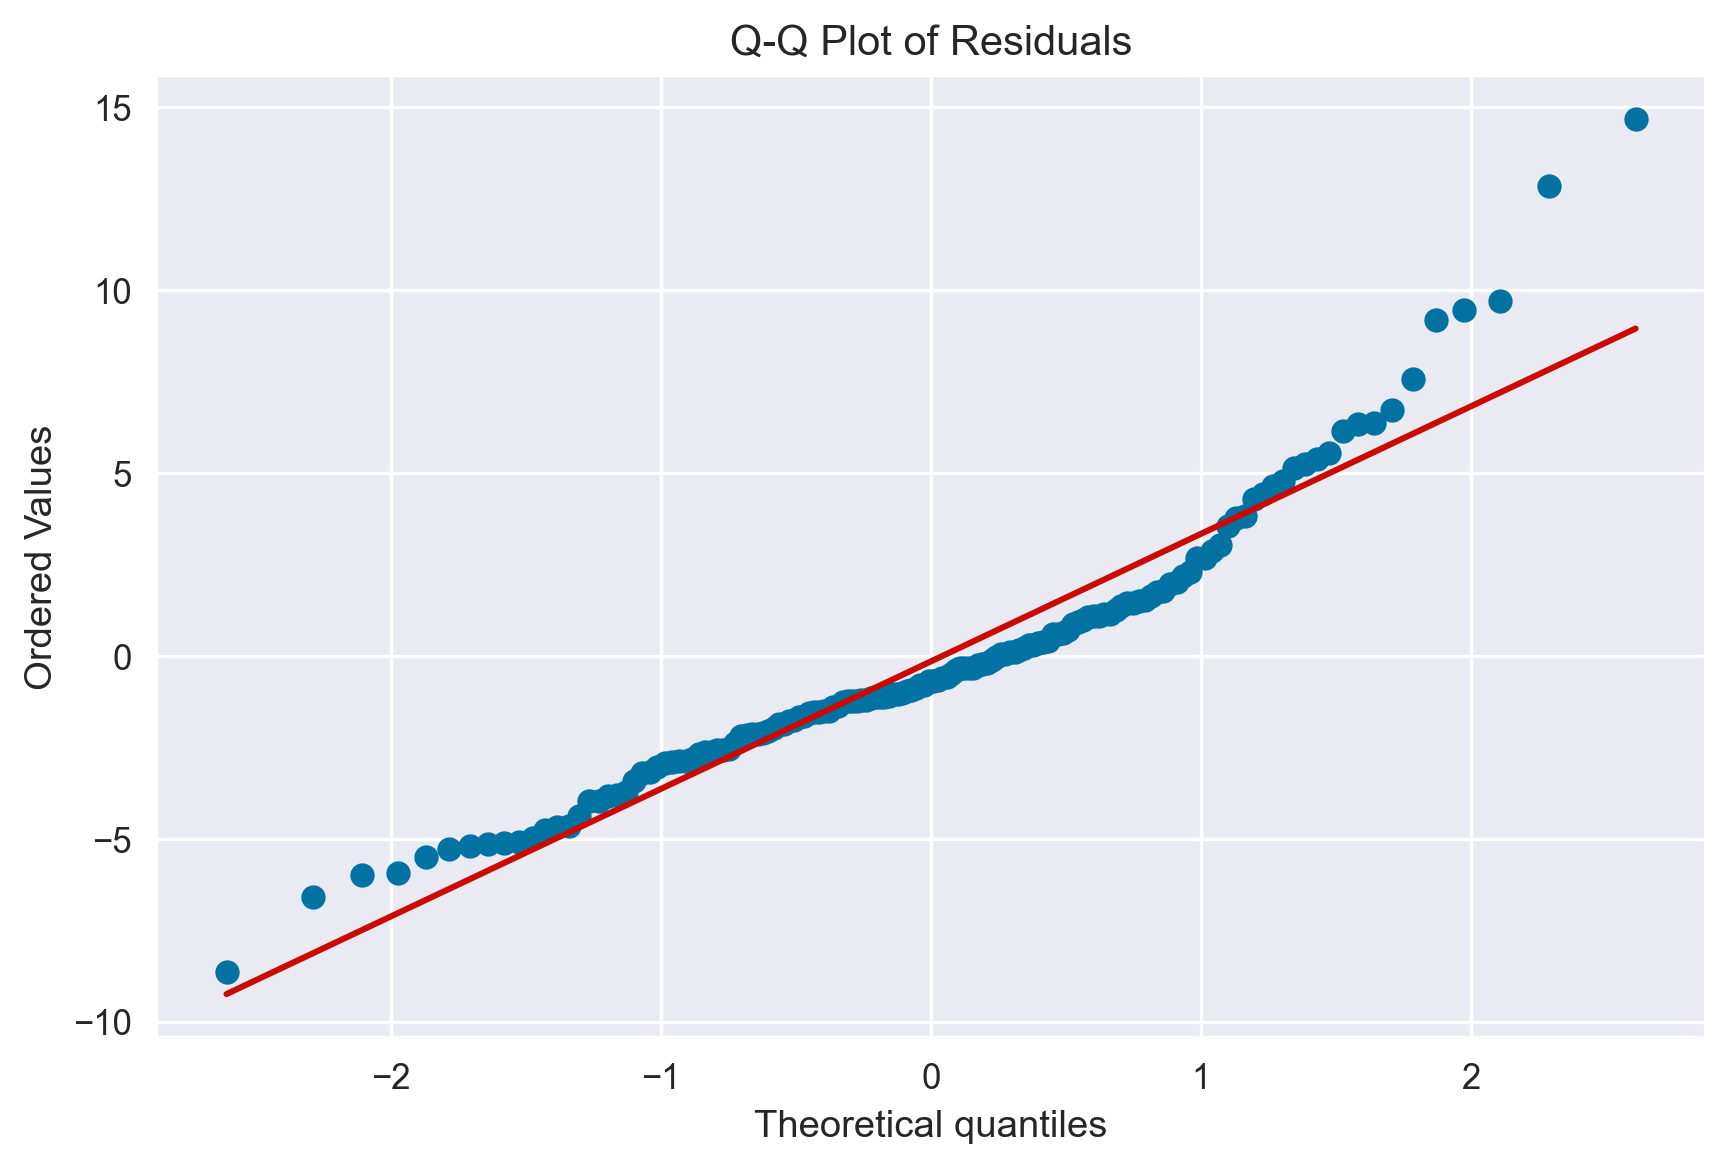

In [39]:
import scipy.stats as stats  # Ensure this is imported before using

plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()
